This project predicts a person’s productivity score based on their daily behavior and work patterns using machine learning.
📌 Goal: To build a non-invasive system that estimates how productive an individual might be , using realistic and measurable features.



Loading the dataset and converting into dataframe.

In [1]:
import pandas as pd 
import numpy as np
data=pd.read_csv("productivity_office_dataset_200k.csv")
data.head(5)

,Sleep_Hours,Start_Work_Hour,Total_Work_Hours,Meetings_Count,Interruptions_Count,Break_Minutes,Task_Completion_Rate,SocialMedia_Min,Emails_Handled,Productivity_Score
0,7.1,10.6,11.6,5.0,6.0,39.0,0.49,49.0,42.0,7.9
1,6.3,8.9,6.8,2.0,4.0,73.0,0.69,72.0,35.0,5.7
2,7.3,7.7,4.4,3.0,5.0,64.0,0.83,93.0,34.0,4.8
3,8.3,7.6,7.8,7.0,2.0,61.0,0.86,32.0,5.0,7.4
4,6.2,8.7,6.9,2.0,4.0,80.0,0.82,24.0,19.0,8.4


Describing the data's

In [2]:
data.describe()

,Sleep_Hours,Start_Work_Hour,Total_Work_Hours,Meetings_Count,Interruptions_Count,Break_Minutes,Task_Completion_Rate,SocialMedia_Min,Emails_Handled,Productivity_Score
count,194048.000000,194000.000000,194000.000000,194000.000000,194000.000000,194000.000000,194056.000000,194054.000000,194000.000000,200000.000000
mean,6.433820,8.999218,6.992963,2.999113,4.997072,51.951366,0.754761,74.245973,26.985041,6.338549
std,1.362464,1.001312,1.503432,1.734711,2.241374,21.636916,0.161937,99.370750,12.980154,1.905916
min,0.000000,4.600000,-0.200000,0.000000,0.000000,15.000000,0.000000,10.000000,5.000000,0.000000
25%,5.700000,8.300000,6.000000,2.000000,3.000000,33.000000,0.650000,38.000000,16.000000,5.200000
50%,6.500000,9.000000,7.000000,3.000000,5.000000,52.000000,0.750000,65.000000,27.000000,6.400000
75%,7.300000,9.700000,8.000000,4.000000,6.000000,71.000000,0.850000,93.000000,38.000000,7.600000
max,12.000000,13.200000,14.000000,14.000000,18.000000,89.000000,1.500000,999.000000,49.000000,10.000000


Getting info's about the data's

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sleep_Hours           194048 non-null  float64
 1   Start_Work_Hour       194000 non-null  float64
 2   Total_Work_Hours      194000 non-null  float64
 3   Meetings_Count        194000 non-null  float64
 4   Interruptions_Count   194000 non-null  float64
 5   Break_Minutes         194000 non-null  float64
 6   Task_Completion_Rate  194056 non-null  float64
 7   SocialMedia_Min       194054 non-null  float64
 8   Emails_Handled        194000 non-null  float64
 9   Productivity_Score    200000 non-null  float64
dtypes: float64(10)
memory usage: 15.3 MB


Checking for the existence of null values

In [4]:
df=pd.DataFrame(data)
df.isnull().sum()

Sleep_Hours             5952
Start_Work_Hour         6000
Total_Work_Hours        6000
Meetings_Count          6000
Interruptions_Count     6000
Break_Minutes           6000
Task_Completion_Rate    5944
SocialMedia_Min         5946
Emails_Handled          6000
Productivity_Score         0
dtype: int64

Clearly there exists Null values . Lets fill it with the mean values of their own column

In [5]:
df.fillna(df.mean(numeric_only=True),inplace=True)
df.isnull().sum()

Sleep_Hours             0
Start_Work_Hour         0
Total_Work_Hours        0
Meetings_Count          0
Interruptions_Count     0
Break_Minutes           0
Task_Completion_Rate    0
SocialMedia_Min         0
Emails_Handled          0
Productivity_Score      0
dtype: int64

Lets split datas for features and target

In [6]:

y=df["Productivity_Score"]
x=df.drop("Productivity_Score" , axis=1)

checking the linearity between the target and the features

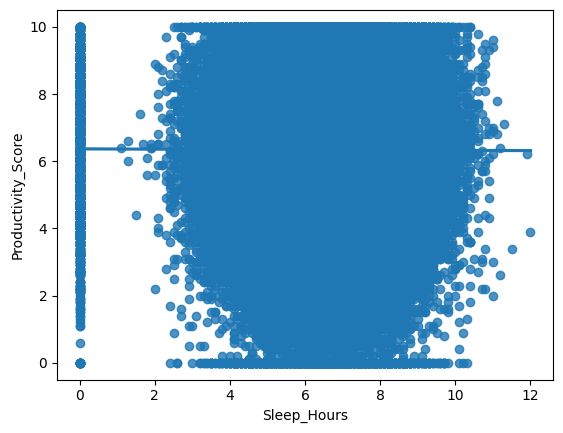

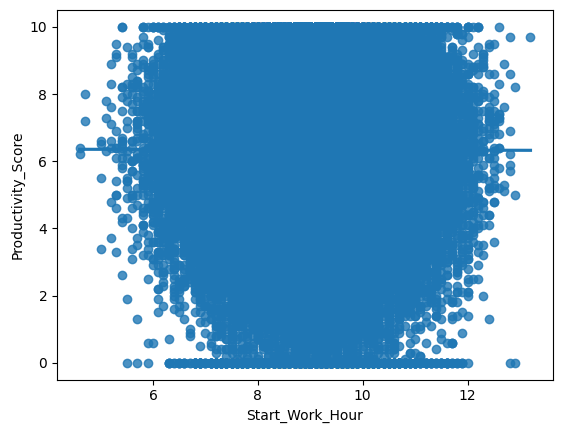

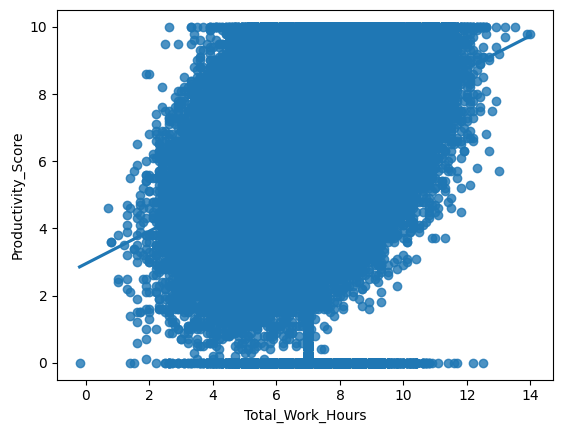

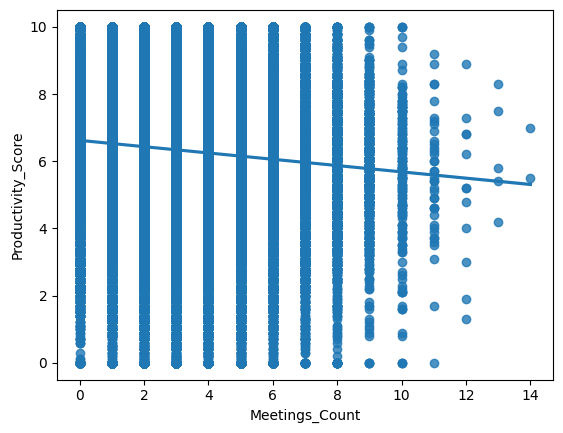

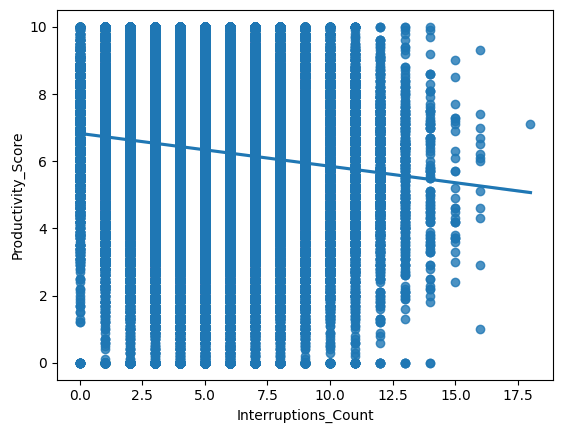

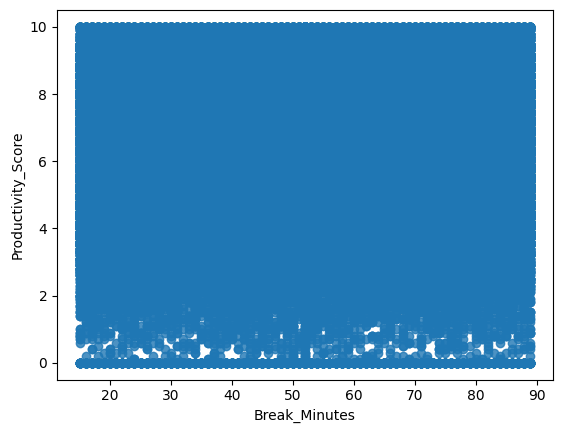

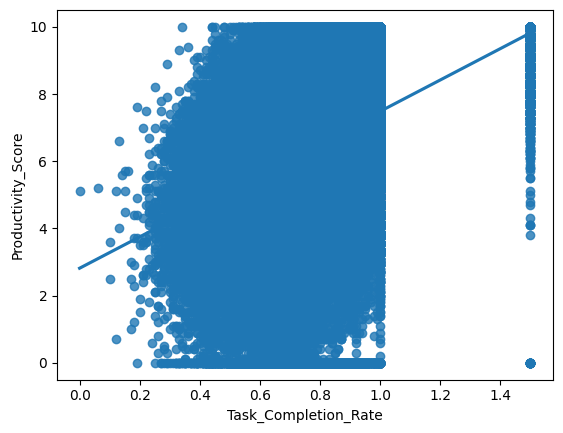

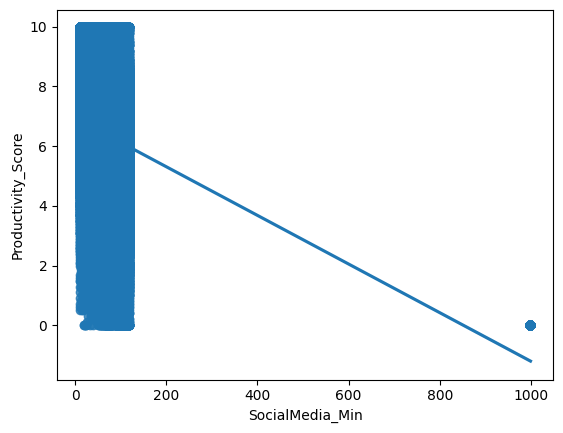

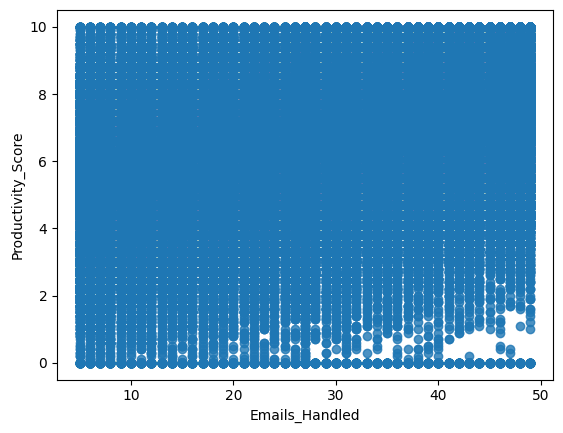

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
for col in x:
    sns.regplot(x=col , y='Productivity_Score',data=df)
    plt.xlabel(col)
    plt.ylabel("Productivity_Score")
    plt.show()


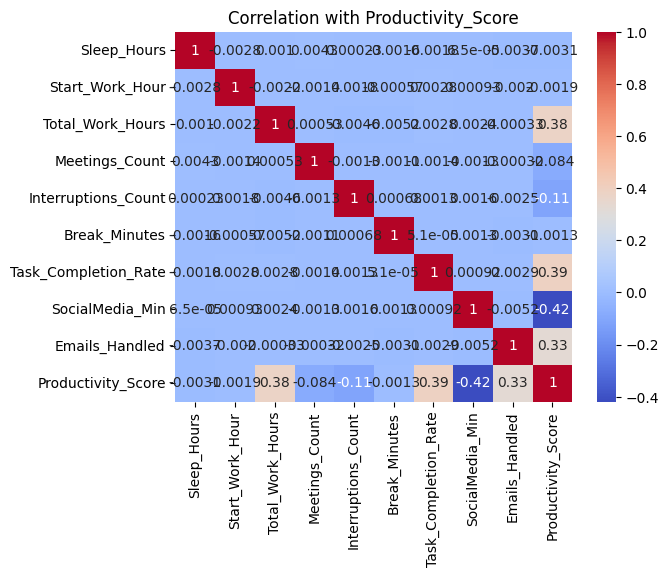

In [8]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Productivity_Score")
plt.show()


There not exists an linearity relationship between some features  will try to build the prediciton model using linear regression for checking the predictions and will move on using the polynomial regression to handle .  

Lets normalize the datasets and train and test split it.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x=scaler.fit_transform(x)
trian_x,test_x,trian_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)



Stepping into choosing the model of linear regression for prediciton

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(trian_x,trian_y)
y_pred=model.predict(test_x)

Having the visualization of predicteed and actual values

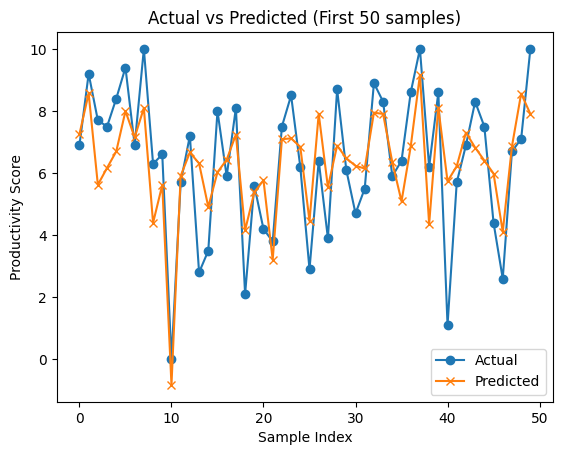

In [11]:
plt.plot(test_y.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.legend()
plt.title("Actual vs Predicted (First 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Productivity Score")
plt.show()


Usage of evaluation metrices

In [12]:
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
print("Mean absolute error : " , mean_absolute_error(test_y,y_pred))
print("Mean squared error : " , mean_squared_error(test_y,y_pred))
print("Root mean squared error :" , np.sqrt(mean_squared_error(test_y,y_pred)))
print("r2 score :",r2_score(test_y , y_pred))

Mean absolute error :  0.9266370167072026
Mean squared error :  1.4657824562162565
Root mean squared error : 1.2106950302269588
r2 score : 0.5993605567682145


Usage of Polynomial regression : 

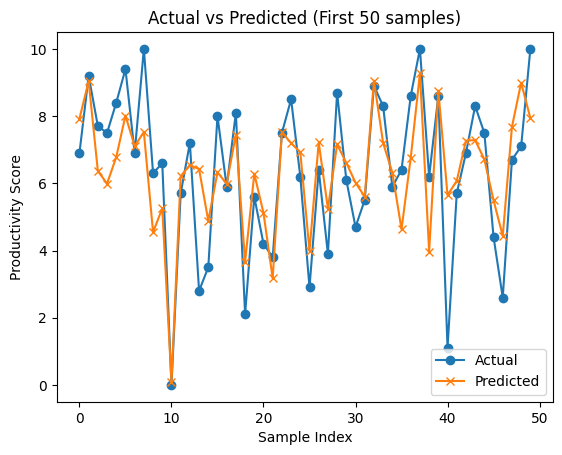

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X = df[["Total_Work_Hours", "Task_Completion_Rate", "Emails_Handled", "SocialMedia_Min"]]
y = df["Productivity_Score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=Pipeline([('poly' ,PolynomialFeatures(degree=2)),('linear' ,LinearRegression())]) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.legend()
plt.title("Actual vs Predicted (First 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Productivity Score")
plt.show()



usage of evaluation

In [14]:

print("Mean absolute error : " , mean_absolute_error(y_test,y_pred))
print("Mean squared error : " , mean_squared_error(y_test,y_pred))
print("Root mean squared error :" , np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score :",r2_score(y_test , y_pred))

Mean absolute error :  0.8922648950811759
Mean squared error :  1.3797341969185526
Root mean squared error : 1.1746208736943817
r2 score : 0.622879958675294


Prediction for new data .

In [15]:
new_data=[[11.6 , 0.49,42,49]]
y_pred=model.predict(new_data)
print(y_pred)

[8.89063609]


c:\Users\elakk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Will use the RandomForestRegressor ensemble technique for better prediciton .

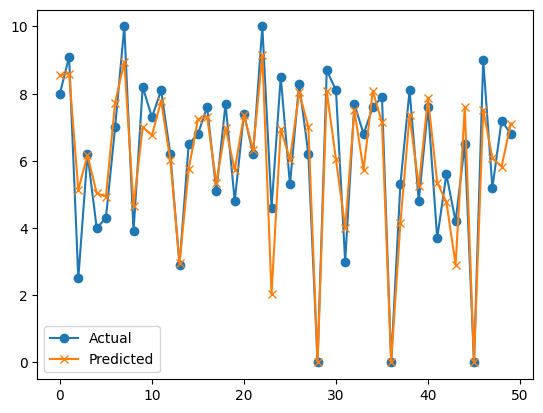

rms :  1.0096458631223129
r2score :  0.7185735407309648


In [16]:
import pandas as pd 
import numpy as np
data=pd.read_csv("productivity_office_dataset_200k.csv")
df=pd.DataFrame(data)
df.fillna(df.mean(numeric_only=True) , inplace=True)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import train_test_split
x=df.drop("Productivity_Score",axis=1)
y=df["Productivity_Score"]
scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y)
rf=RandomForestRegressor()
model=rf.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
plt.plot(y_test.values[:50],label="Actual" ,marker='o')
plt.plot(y_pred_rf[:50],label="Predicted" ,marker='x')
plt.legend()
plt.show()
print("rms : " ,np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("r2score : " ,r2_score(y_test,y_pred_rf))




In [17]:
features=['Sleep_Hours', 'Start_Work_Hour', 'Total_Work_Hours', 
                 'Meetings_Count', 'Interruptions_Count', 'Break_Minutes', 
                 'Task_Completion_Rate', 'SocialMedia_Min', 'Emails_Handled']
new_data=pd.DataFrame([[7.1,10.6,11.6,5,6,39,0.49,49,42]],columns=features)
new_data=scaler.transform(new_data)
y_pred_new=model.predict(new_data)
print(y_pred_new)

[8.022]


The predictions where almost same . Lets hyper tune this model .

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[100,200],
            'max_depth':[20,None],
            'min_samples_split':[50],
            'min_samples_leaf':[10],
            'max_features':['sqrt'],
            'bootstrap':[True]
            }
search=RandomizedSearchCV(n_iter=10,param_distributions=param_grid,n_jobs=-1,cv=2,verbose=2,random_state=42,estimator=random)
model=search.fit(x_train,y_train)
best=model.best_estimator_
y_pred=best.predict(x_test)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


c:\Users\elakk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluation Metrices for randomforest hyper tuned one.

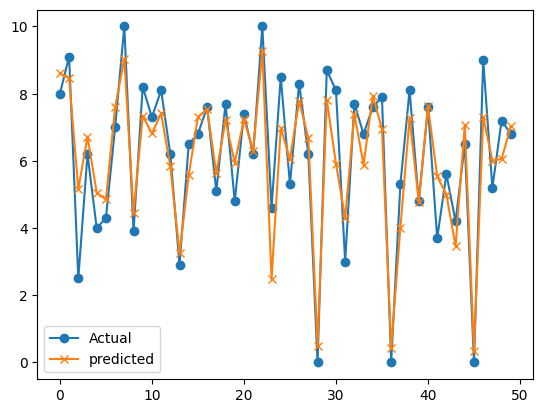

r2_score :  0.7224209442459562
rms :  1.0027206383842484
[7.6794691]


In [19]:
plt.plot(y_test.values[:50] , label="Actual" , marker="o")
plt.plot(y_pred[:50],label="predicted" ,marker='x')
plt.legend()
plt.show()
print("r2_score : " ,r2_score(y_test,y_pred))
print("rms : ",np.sqrt(mean_squared_error(y_test , y_pred)))
features=['Sleep_Hours', 'Start_Work_Hour', 'Total_Work_Hours', 
                 'Meetings_Count', 'Interruptions_Count', 'Break_Minutes', 
                 'Task_Completion_Rate', 'SocialMedia_Min', 'Emails_Handled']
new_data=pd.DataFrame([[7.1,10.6,11.6,5,6,39,0.49,49,42]],columns=features)
new_data=scaler.transform(new_data)
y_pred_new=model.predict(new_data)
print(y_pred_new)

Pickle code down below ..... Let's start the deployment process...

In [24]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [26]:
# inclusion of that scaler transform as we used normalization for the prediction new data's
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
